# Finding Blueberry Edges

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage import filters
import numpy as np
from scipy import ndimage

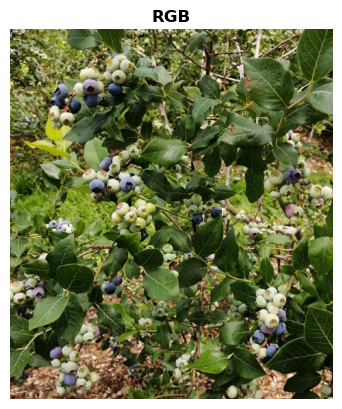

In [2]:
berries = cv2.imread("./images/blueberries.jpg")
berries = cv2.cvtColor(berries, cv2.COLOR_BGR2RGB)

plt.imshow(berries)
plt.axis('off')
plt.title('RGB')
plt.show()

Edges detection using the default Sobel method.

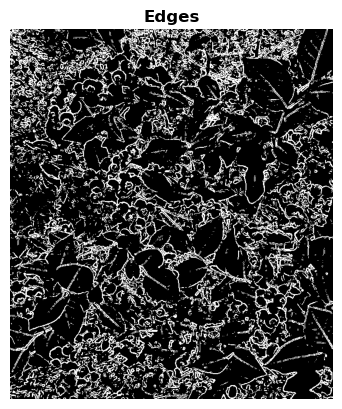

In [3]:
berries_grayscale = cv2.cvtColor(berries, cv2.COLOR_RGB2GRAY)
berries_edge = filters.sobel(berries_grayscale)
berries_edge = berries_edge / berries_edge.max() * 255
thresh, berries_edge = cv2.threshold(berries_edge.astype(np.uint8), 127, 255, cv2.THRESH_OTSU)

plt.imshow(berries_edge, cmap='gray')
plt.title("Edges")
plt.axis('off')
plt.show()

Import a pre-made binary mask, created using HSV thresholding and cleaned with morphological operations.

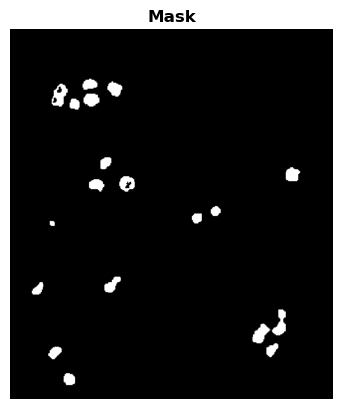

In [4]:
berries_mask = cv2.imread('./images/blueberries_BW.jpg', cv2.IMREAD_GRAYSCALE)
_, berries_mask = cv2.threshold(berries_mask.astype(np.uint8), 127, 255, cv2.THRESH_OTSU)

plt.imshow(berries_mask, cmap='gray')
plt.title("Mask")
plt.axis('off')
plt.show()

There are many objects in the image of blueberries: leaves, ground cover, unripe blueberries, and ripe blueberries. If we use the edge function without any preprocessing, the result is a bit of a mess. 
On the other hand, if we threshold and binarize the image first, we can obtain clean edges of just the ripe blueberries. We've loaded a cleaned binary mask into BW. We can find the edges of connected objects in the binary image using [findContours()](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) function.

In [5]:
berries_mask = ndimage.binary_fill_holes(berries_mask)
berries_contours, _ = cv2.findContours(berries_mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

We can find out by visualizing the boundaries on top of the original image.

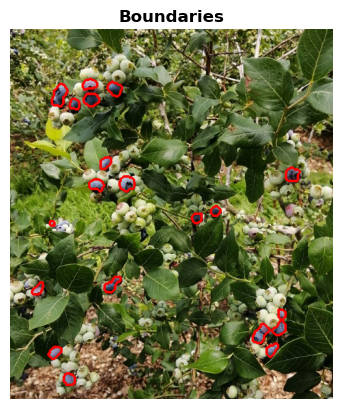

In [6]:
berries = cv2.drawContours(berries, berries_contours, -1, (255, 0, 0), 3)

plt.imshow(berries)
plt.title("Boundaries")
plt.axis('off')
plt.show()